In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Анализ данных

##### Получим датасет

In [2]:
dataset = pd.read_csv('vk_test_data.csv')
dataset.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
0,1.554744e+09,report,CPM,0,no_agency,client_21074,campaign_27489,ad_27489,android,2019-04-08
1,1.555103e+09,click,CPM,0,no_agency,client_22392,campaign_35893,ad_35893,android,2019-04-12
2,1.555403e+09,click,CPM,0,no_agency,client_16836,campaign_26799,ad_26804,web,2019-04-16
3,1.554822e+09,click,CPM,0,no_agency,client_22920,campaign_37146,ad_37146,android,2019-04-09
4,1.554967e+09,click,CPM,0,no_agency,client_645,campaign_15893,ad_15944,web,2019-04-11


##### Переводим поле time в человекочитаемый вид, добавляем поле date

In [3]:
dataset['time'] = pd.to_datetime(dataset['time'], unit='s')
dataset['date'] = dataset['time'].dt.strftime('%Y-%m-%d')
dataset = dataset.sort_values('time');

##### Группируем события по дате

In [4]:
events_count_by_days = dataset.groupby(['date']).size()
events_count_by_days

date
2019-04-01     5172
2019-04-02     5269
2019-04-03     5357
2019-04-04     5108
2019-04-05     5305
2019-04-06     3955
2019-04-07     4091
2019-04-08     8902
2019-04-09     7963
2019-04-10     7098
2019-04-11    18259
2019-04-12    10740
2019-04-13    10999
2019-04-14     8656
2019-04-15     7457
2019-04-16     7766
dtype: int64

##### На основе получившегося датасета строим график

3574.8170203755417

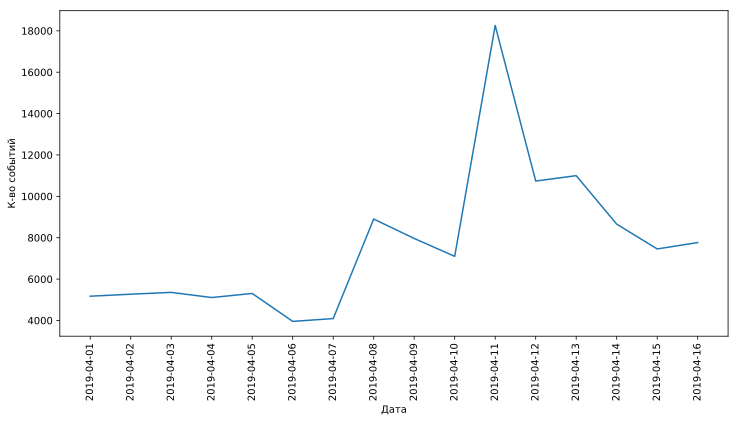

In [5]:
plt.figure(figsize=(12, 6))
plt.xlabel('Дата')
plt.ylabel('К-во событий')
plt.xticks(rotation=90)
plt.plot(events_count_by_days);
events_count_by_days.std()


##### Выделяем отдельные типы событий

In [6]:
click_events = dataset.loc[dataset['event'] == 'click', ['date', 'event']]
view_events = dataset.loc[dataset['event'] == 'view', ['date', 'event']]
report_events = dataset.loc[dataset['event'] == 'report', ['date', 'event']]

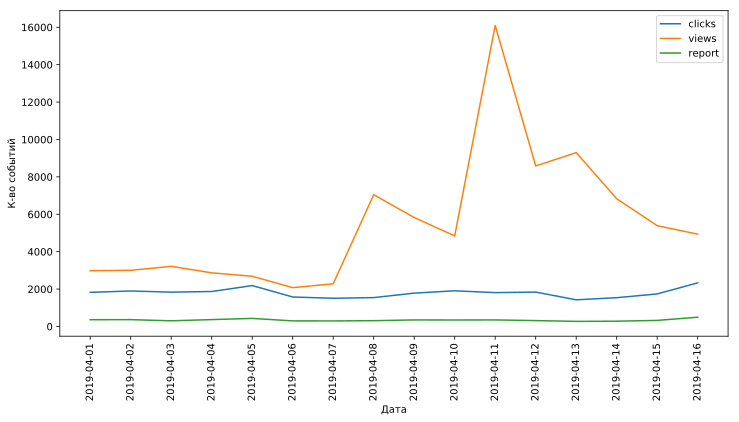

In [7]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.plot(click_events.groupby(['date']).size(), label='clicks')
plt.plot(view_events.groupby(['date']).size(), label='views')
plt.plot(report_events.groupby(['date']).size(), label='report')
plt.xlabel('Дата')
plt.ylabel('К-во событий')
plt.legend();

##### На графике видно, что аномалия только в типе события "Просмотры"
##### Далее строим еще два графика, но уже по типу оплаты за рекламу

In [8]:
CPM_events = dataset.loc[dataset['ad_cost_type'] == 'CPM', ['date', 'event']]
CPC_events = dataset.loc[dataset['ad_cost_type'] == 'CPC', ['date', 'event']]

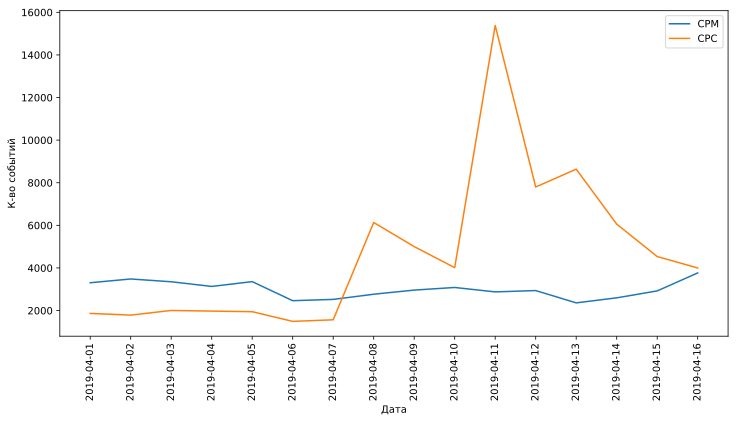

In [9]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.plot(CPM_events.groupby(['date']).size(), label='CPM')
plt.plot(CPC_events.groupby(['date']).size(), label='CPC')
plt.xlabel('Дата')
plt.ylabel('К-во событий')
plt.legend();

##### Странно, что аномальный пик приходится на просмотры, при том, что тип объявления с оплатой за клик. Копаем дальше.
##### Выделяем день первого странного пика — 2019-04-08

In [10]:
CPC_views = dataset.loc[dataset['ad_cost_type'] == 'CPC', :].loc[dataset['event'] == 'view', :]
CPC_views = CPC_views.sort_values('date')
CPC_anomaly_1 = CPC_views.loc[CPC_views['date'] == '2019-04-08', :]
pd.set_option('display.max_rows', 800)

##### Смотрим сколько объявлений было задействовано у каждого агенства с разбивкой по клиентам

In [11]:
CPC_anomaly_1.groupby(['agency_union_id', 'client_union_id', 'campaign_union_id'])['ad_id'].size()

agency_union_id  client_union_id  campaign_union_id
agency_10400     client_119932    campaign_119934         1
agency_1046      client_114954    campaign_114954        12
agency_11        client_98413     campaign_98415          5
                                  campaign_98416          1
                                  campaign_98417          2
                                  campaign_98423          2
                                  campaign_98429          1
                                  campaign_98433          2
                                  campaign_98563          1
                 client_98415     campaign_98791         11
                 client_98421     campaign_98928          1
                 client_98436     campaign_98938          1
                 client_98442     campaign_98963          1
agency_112       client_104696    campaign_104756         4
                 client_104697    campaign_104799         5
agency_1187      client_115275    campaign_11541

##### У агенства agency_2 под клиентом client_47270 видим аномальные 4376 событий
##### Смотрим два других пика — 11е и 13е апреля

In [12]:
CPC_anomaly_2 = CPC_views.loc[CPC_views['date'] == '2019-04-11', :]
CPC_anomaly_3 = CPC_views.loc[CPC_views['date'] == '2019-04-13', :]

In [13]:
CPC_anomaly_2.groupby(['agency_union_id', 'client_union_id', 'campaign_union_id'])['ad_id'].count()

agency_union_id  client_union_id  campaign_union_id
agency_1046      client_114954    campaign_114954          6
agency_11        client_98413     campaign_98413           3
                                  campaign_98415           4
                                  campaign_98429           3
                                  campaign_98554           1
                                  campaign_98563           1
                 client_98415     campaign_98791           8
                 client_98421     campaign_98928           1
                 client_98442     campaign_98962           2
                                  campaign_98963           1
agency_1187      client_115272    campaign_115273         10
                 client_115275    campaign_115410          3
                                  campaign_115415          1
                 client_115309    campaign_115634          1
                 client_115487    campaign_115647          1
agency_1274      client_115674   

In [14]:
CPC_anomaly_3.groupby(['agency_union_id', 'client_union_id', 'campaign_union_id'])['ad_id'].count()

agency_union_id  client_union_id  campaign_union_id
agency_10201     client_119903    campaign_119903         3
                                  campaign_119904         2
agency_1046      client_114954    campaign_114954         5
agency_11        client_98413     campaign_98415          3
                                  campaign_98423          4
                                  campaign_98433          1
                 client_98415     campaign_98791          6
                 client_98442     campaign_98962          1
agency_1187      client_115272    campaign_115273        12
                                  campaign_115316         2
                 client_115275    campaign_115410         4
                                  campaign_115415         1
agency_1274      client_115674    campaign_115674         5
agency_137       client_105164    campaign_105164         2
agency_1393      client_116026    campaign_116026         1
agency_1434      client_116173    campaign_11617

##### Пик снова у агенства agency_2 под клиентом client_47270
##### Строим график событий для клиента 47270 

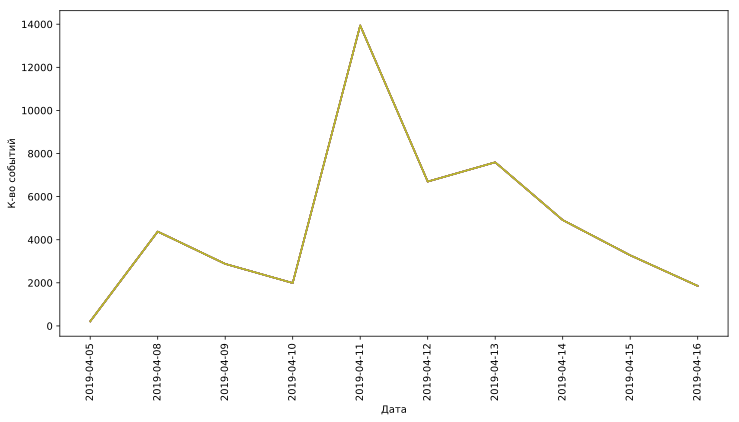

In [15]:
anomaly_client = dataset.loc[dataset['agency_union_id'] == 'agency_2', :].loc[dataset['client_union_id'] == 'client_47270', :]
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.xlabel('Дата')
plt.ylabel('К-во событий')
plt.plot(anomaly_client.groupby(['date']).count(), label='CPM');

##### Смотрим равномерно ли распределены платформы, на которых произошло событие

In [16]:
platforms = anomaly_client.groupby(['platform']).count()

platforms

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,date
platform,,,,,,,,,
android,34685,34685,34685,34685,34685,34685,34685,34685,34685
iphone,4971,4971,4971,4971,4971,4971,4971,4971,4971
mvk,3924,3924,3924,3924,3924,3924,3924,3924,3924
web,4159,4159,4159,4159,4159,4159,4159,4159,4159


#### Заметен сильный перекос в сторону платформы Андроид. Это говорит, что возможно реклама была таргетирована на конкретных пользователей, которые не провзаимодействовали с ней. Возможно на ботов.

#### На всякий случай поверяем основные показатели для найденого агенства

In [17]:
anomaly_click_events = anomaly_client.loc[anomaly_client['event'] == 'click', ['date', 'event']]
anomaly_view_events = anomaly_client.loc[anomaly_client['event'] == 'view', ['date', 'event']]
anomaly_report_events = anomaly_client.loc[anomaly_client['event'] == 'report', ['date', 'event']]
anomaly_CPM_events = anomaly_client.loc[anomaly_client['ad_cost_type'] == 'CPM', ['date', 'event']]
anomaly_CPC_events = anomaly_client.loc[anomaly_client['ad_cost_type'] == 'CPC', ['date', 'event']]
anomaly_campaign_events = anomaly_client.loc[anomaly_client['campaign_union_id'] == 'campaign_49554', ['date', 'event']]

In [18]:
anomaly_click_events.shape

(45, 2)

In [19]:
anomaly_view_events.shape

(47688, 2)

In [20]:
anomaly_report_events.shape

(6, 2)

In [21]:
anomaly_CPM_events.shape

(0, 2)

In [22]:
anomaly_CPC_events.shape

(47739, 2)

In [23]:
anomaly_campaign_events.shape

(47739, 2)

#### Да, аномалия на графике точно связана с рекламной кампанией номер 49554 этого агенства

#### Получается клиент агенства создал рекламную кампанию (id = campaign_49554) с объявлениями с оплатой за клик. У этой кампании 45 кликов и 47688 просмотров, которые и формируют большую часть событий.
#### Есть две гепотезы что случилось:
#### 1. Была создана рекламная кампания, которая транслируется на нерелевантную аудиторию. Объявление показывается пользователям, но не интересно им, следовательно они на него не кликают.
#### 2. Агенство накручивает проказы через список ретаргетинга и сеть из бот-аккаунтов. Об этом говорит сильный перекос в сторону платформы андроид — показов на этой платформе в 7,9 раз больше, чем среднее по другим платформам.

##### P.S Я бы точно проверил это агенство номер 2

### Сиситема оповещения об аномалиях

##### Для того, чтобы отдетектить аномалии на различных интервалах я группирую датасет по времени. Функция принимает собственно сам датасет и период в секундах, на котором нужно искать аномалии. Далее, находим нормальное отклонение и среднее значение. После чего через Z-оценку (или правило трех сигм, или межквартильный размах) оперделяем выбросы и заносим их в массив с аномалиями. 

In [44]:
def anomaly_detect(dataset, period=5):
    
    sorted_df = dataset.sort_values('time').reset_index().drop('index', axis=1)
    
    period_group = sorted_df['time'].groupby(sorted_df['time'].dt.floor(f"{period}T")).count()
    
    C_KR = 1.95 ### Уточнение критической точки для 95% наблюдений по таблице значений Лапласа
    
    S = period_group.std()
    mean  = period_group.mean()
    anomalys = []
    
    for i in period_group:
        if abs(i - mean) / S > C_KR:
            anomalys.append(i)
            
    return anomalys
    
anomaly_count = len(anomaly_detect(dataset, 1440))
    
if anomaly_count > 0:
    print(f"Alarm, you have {anomaly_count} anomalys")

Alarm, you have 1 anomalys
